<h1> packages installation </h1>

In [198]:
!pip install kagglehub
!pip install scipy
!pip install seaborn
!pip install statsmodels
!pip install ipympl

<h1> Imports </h1>


In [199]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency, pointbiserialr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans




<h1> Dataset path </h1>

In [200]:

if 'vscode' in sys.modules:
    DATASET_PATH = './heart.csv'
elif 'google.colab' in sys.modules:
    dataset_folder = kagglehub.dataset_download('fedesoriano/heart-failure-prediction')
    DATASET_PATH = os.path.join(dataset_folder, 'heart.csv')
else:
    raise Exception('Unknown environment')

<h1> Some global settings </h1>

In [201]:
pd.set_option('display.float_format', '{:.2f}'.format)

<h1> 1 - Data Exploration and visualization </h1>

<h2> 1.1 - Overview (first part) </h2>

In [202]:
df = pd.read_csv(DATASET_PATH)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1


<h2> 1.2 - Overview (second part)</h2>

In [203]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


<h2> 1.3 - Frequency plot & histogram </h2>

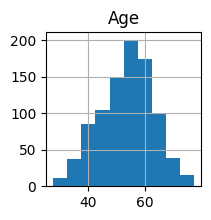

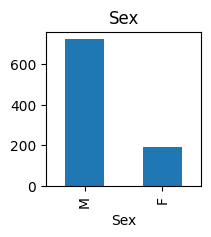

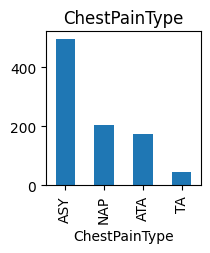

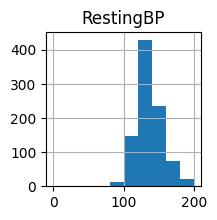

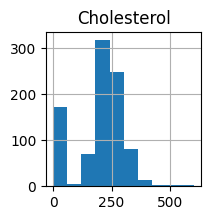

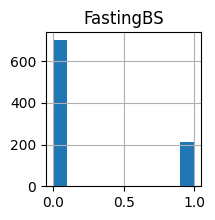

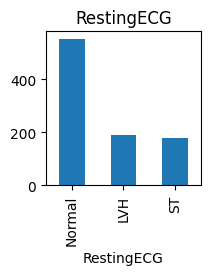

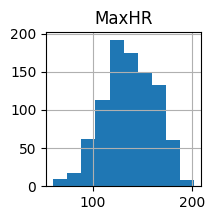

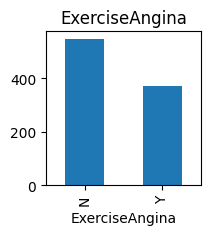

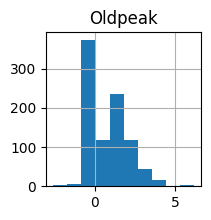

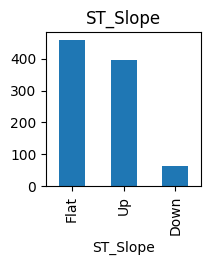

In [204]:
# select all columns except the last one (target)
all_features = df.iloc[:,:-1]
# display plot for each column
for column in all_features.columns:
    # display a plot depending on the type of the column, catogonal(object) or numerical
    if all_features[column].dtype == 'object':
        # frequency plot
        all_features[column].value_counts().plot(kind='bar', title=column, figsize=(2, 2))
        plt.show() 
    else:
        # histogram
        all_features[column].hist(figsize=(2, 2))
        plt.title(column)  
        plt.show() 



<h2> 1.4 - Probability density function (groupd graphs)</h2>

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

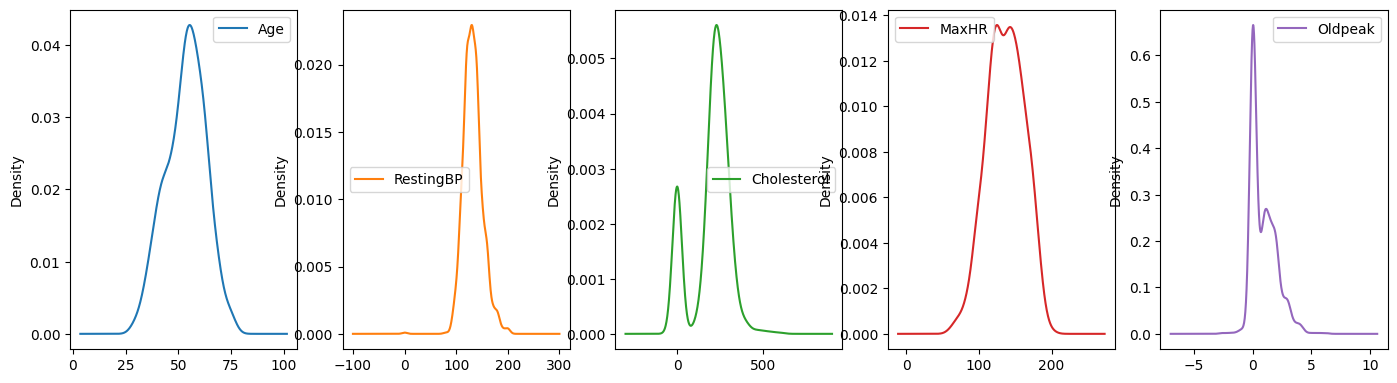

In [205]:
CONTINUOUS_FEATURES = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# categorical = all columns - continuous columns - target(HeartDisease)
CATEGORICAL_FEATURES = df.columns.difference(CONTINUOUS_FEATURES).difference(['HeartDisease'])
# plot the probability density function for each numerical feature
df[CONTINUOUS_FEATURES].plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(17,15))

<h2> 1.5 - Probability density function (individual graphs)</h2>

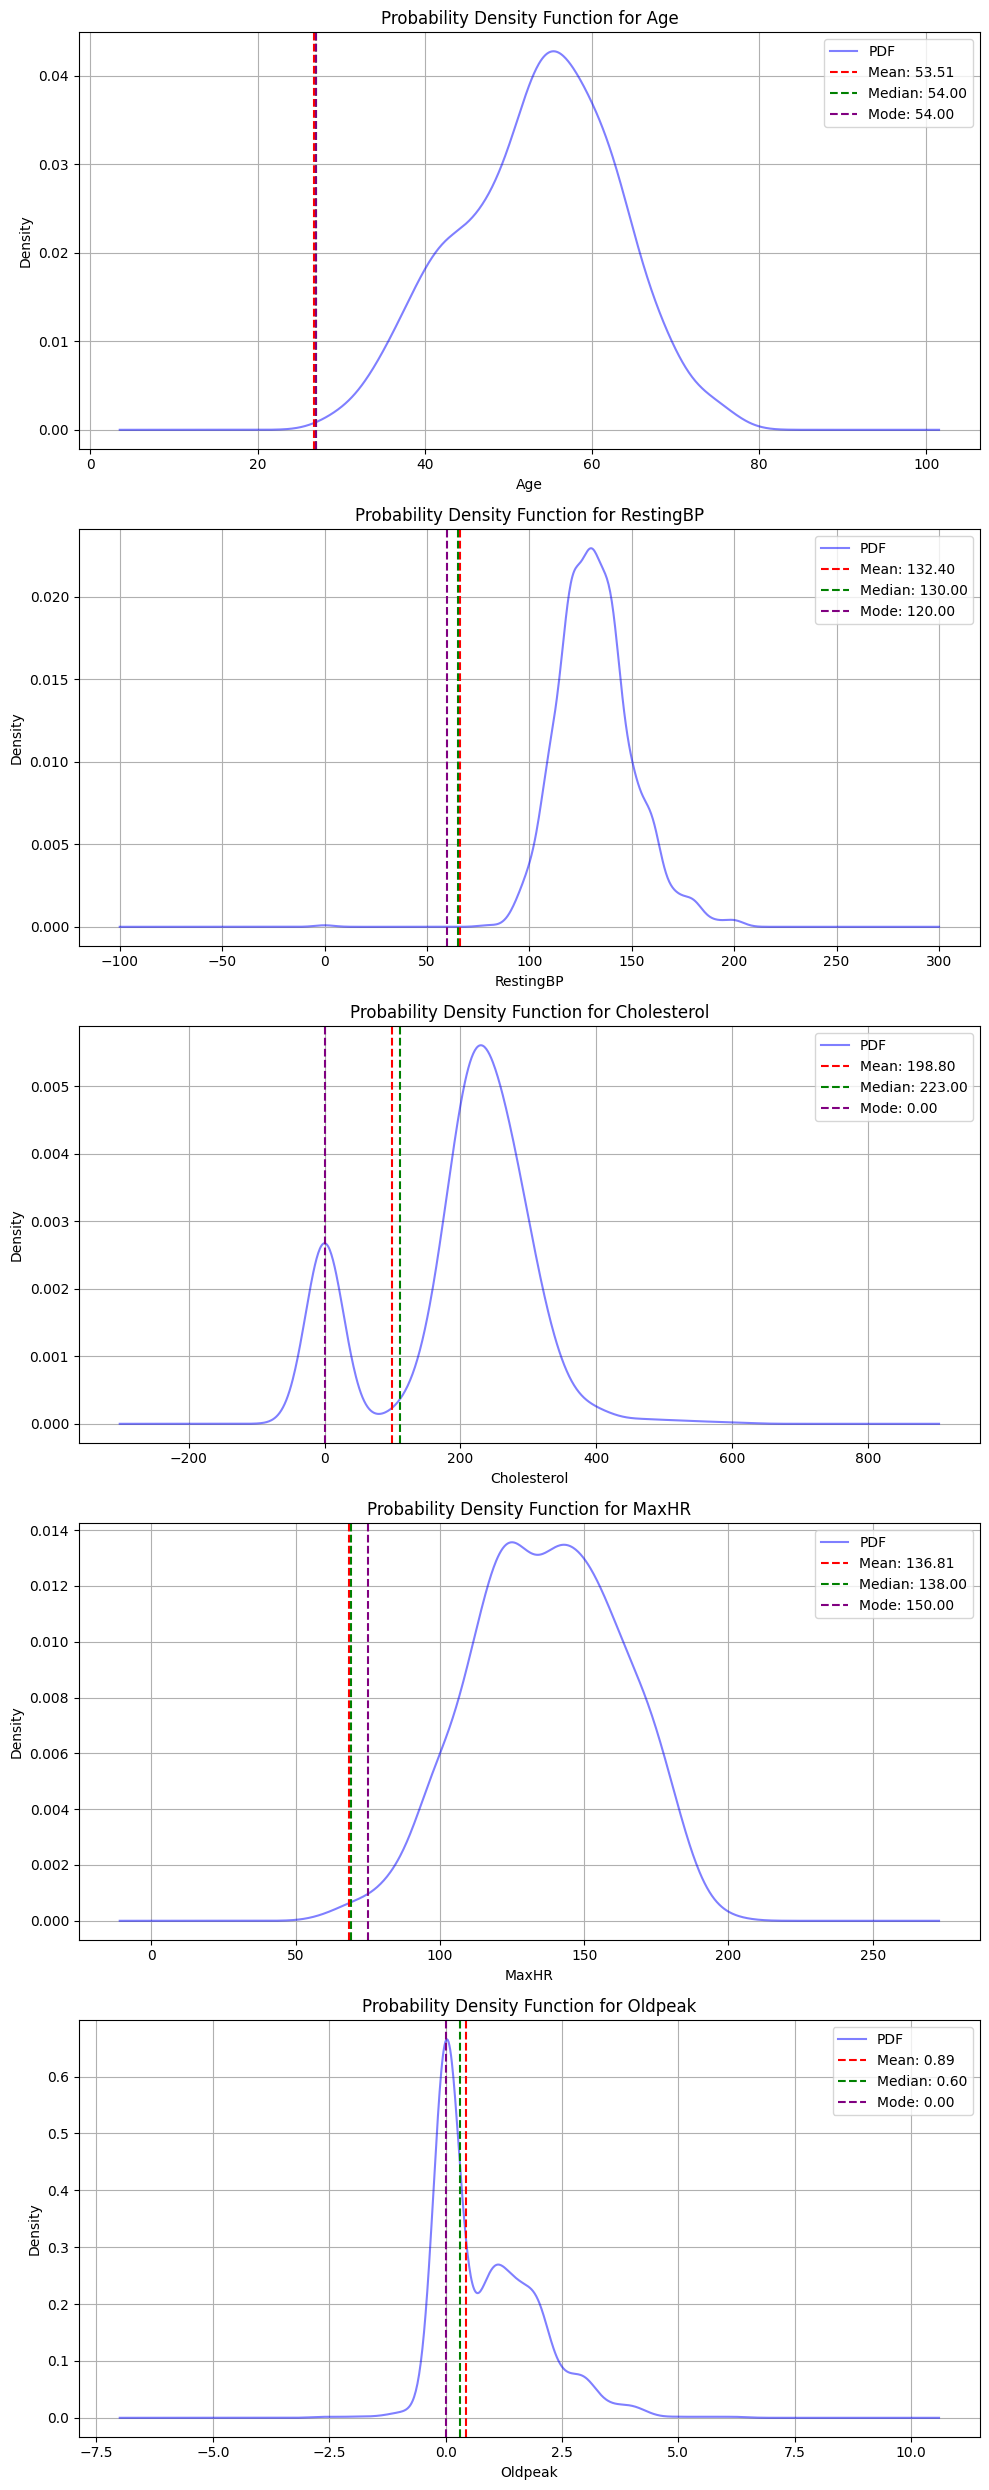

In [206]:
# (this cell does the same thing as the previous cell, but additionally display the mean, median and mode for each column)

num_features = len(CONTINUOUS_FEATURES)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Loop through each feature to create a PDF plot
for i, column in enumerate(CONTINUOUS_FEATURES):
    # Plotting the density
    df[column].plot(kind='density', ax=axes[i], color='blue', alpha=0.5, label='PDF')

    # Calculate mean, median, and mode
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]

    # Marking mean, median, and mode with horizontal lines
    axes[i].axvline(x=mean / 2, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=median / 2, color='green', linestyle='--', label=f'Median: {median:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=mode / 2, color='purple', linestyle='--', label=f'Mode: {mode:.2f}')  # Adjusted y-value for visibility

    # Adding titles and labels
    axes[i].set_title(f'Probability Density Function for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<h2> 1.6 - Skeweness</h2>

In [207]:
# plot the skewness for each column
df[CONTINUOUS_FEATURES].skew()

Age           -0.20
RestingBP      0.18
Cholesterol   -0.61
MaxHR         -0.14
Oldpeak        1.02
dtype: float64

<h2> 1.7 - Box plot</h3>

Age               Axes(0.125,0.747241;0.227941x0.132759)
RestingBP      Axes(0.398529,0.747241;0.227941x0.132759)
Cholesterol    Axes(0.672059,0.747241;0.227941x0.132759)
MaxHR             Axes(0.125,0.587931;0.227941x0.132759)
Oldpeak        Axes(0.398529,0.587931;0.227941x0.132759)
dtype: object

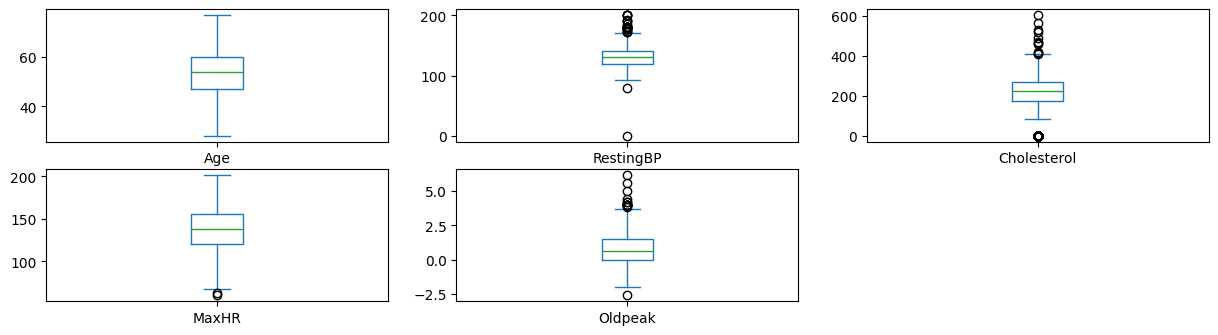

In [208]:
df[CONTINUOUS_FEATURES].plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(5,3), figsize=(15,10))

<h1> 2 - Data cleaning and processing </h1>

<h2> 2.1 - Handling missing values </h2>

In [209]:
# Check for missing values in each column
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Given that the dataset contains no missing values for any of the features, there was no need to perform replacement for missing values, dropping any rows with missing values, or dropping any features.

<h2> 2.2 - Remove Outliers </h2>

In [210]:
def remove_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5 * IQR) & (column <= Q3 + 1.5 * IQR)]

for column in CONTINUOUS_FEATURES:
    initial_count = df[column].count()
    df[column] = remove_outliers(df[column])
    final_count = df[column].count()
    print(f'{column}: was {initial_count} values, became {final_count}')


Age: was 918 values, became 918
RestingBP: was 918 values, became 890
Cholesterol: was 918 values, became 735
MaxHR: was 918 values, became 916
Oldpeak: was 918 values, became 902


<h2> 2.3 - Drop rows with NaN values that resulted from outlier removal </h2>

In [211]:
df.dropna(subset=CONTINUOUS_FEATURES, inplace=True)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,702.00,702.00,702.00,702.00,702.00,702.00,702.00
mean,52.72,131.56,239.71,0.16,140.55,0.83,0.46
std,9.54,15.42,50.68,0.37,24.36,0.96,0.50
min,28.00,92.00,85.00,0.00,71.00,-0.10,0.00
25%,46.00,120.00,206.00,0.00,122.00,0.00,0.00
50%,54.00,130.00,235.00,0.00,140.00,0.40,0.00
75%,59.00,140.00,272.00,0.00,160.00,1.50,1.00
max,77.00,170.00,404.00,1.00,202.00,3.60,1.00


<h2> 2.4 - Deal with duplicates </h2>

In [212]:
num_duplicates = df.duplicated().sum()
print(f'Number of duplicates: {num_duplicates}')

Number of duplicates: 0


<h2> 2.5 - Feature scaling </h2>

We opt for Standardization becauase: These features have different units (e.g., mmHg, mg/dL) and wide ranges. Standardization ensures they are on a comparable scale (mean 0, standard deviation 1) while preserving the shape of the distribution.

In [213]:
sc = StandardScaler()
df[CONTINUOUS_FEATURES] = sc.fit_transform(df[CONTINUOUS_FEATURES])
df[CONTINUOUS_FEATURES]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,-1.34,0.55,0.97,1.29,-0.87
1,-0.39,1.85,-1.18,0.63,0.18
2,-1.65,-0.10,0.85,-1.75,-0.87
3,-0.50,0.42,-0.51,-1.34,0.70
4,0.13,1.20,-0.88,-0.76,-0.87
...,...,...,...,...,...
913,-0.81,-1.40,0.48,-0.35,0.38
914,1.60,0.81,-0.92,0.02,2.68
915,0.45,-0.10,-2.15,-1.05,0.38
916,0.45,-0.10,-0.07,1.37,-0.87


<h1> 3 - Feature extraction & selection </h1>

<h2> 3.1 - Correlation </h2>

<h2> 3.1.1 - Correlation between numerical features</h2>

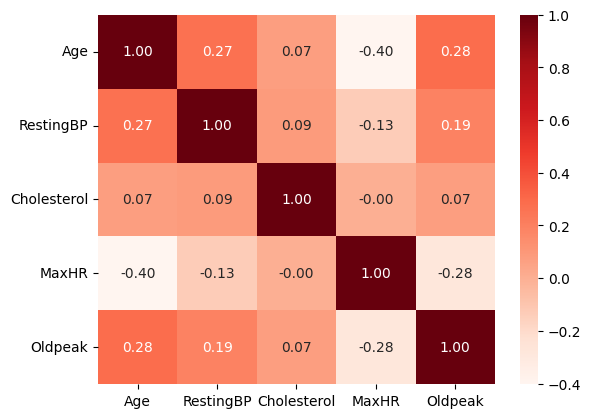

In [214]:
# numerical - numerical correlation
selected_df_corr = df.loc[:,CONTINUOUS_FEATURES]
correlation_matrix = selected_df_corr.corr()  # Calculate correlation matrix for numerical columns
sns.heatmap(correlation_matrix, cmap='Reds', annot=True, fmt='.2f')
plt.show()

<h4> The strongest correlation is between the features 'Age' and 'Oldpeak' (= 0.28), lets plot these 2 features to see the correlation better</h4>

<Axes: xlabel='Age', ylabel='Oldpeak'>

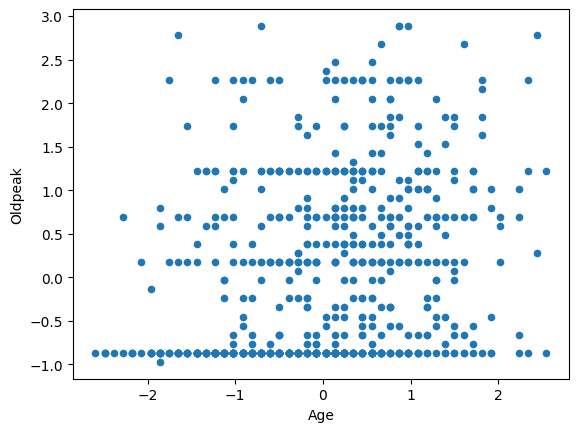

In [215]:
df.plot(kind='scatter', x='Age',y='Oldpeak')

From the plot, It is clear that there is no strong correlation between the features 'Age' and 'Oldpeak'.

Since the strongest correlation between any 2 numerical featurs = 0.28, which is cleary not strong from the graph, we decide not to exclude any of the features.

<h2> 3.1.2 - Correlation between categorical features</h2>

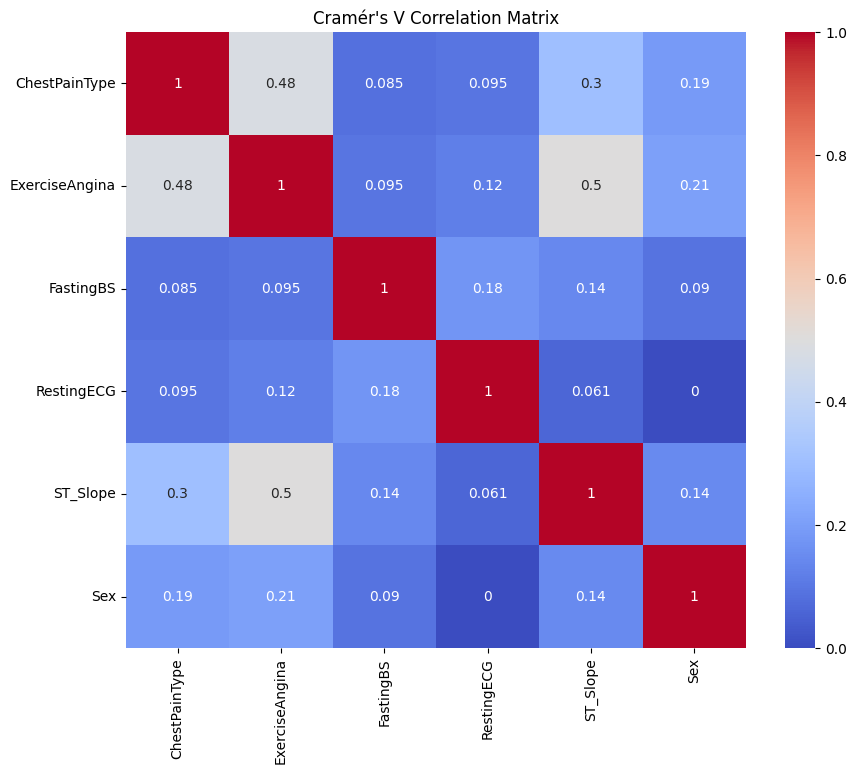

In [216]:
# Categorical - Categorical correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_features = df.loc[:, CATEGORICAL_FEATURES]
corr_matrix = pd.DataFrame(np.zeros((len(categorical_features.columns), len(categorical_features.columns))), 
                           index=categorical_features.columns, columns=categorical_features.columns)

for col1 in categorical_features.columns:
    for col2 in categorical_features.columns:
        if col1 != col2:
            corr_matrix.loc[col1, col2] = cramers_v(categorical_features[col1], categorical_features[col2])
        else:
            corr_matrix.loc[col1, col2] = 1.0

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Cramér\'s V Correlation Matrix')
plt.show()

#### As we can see, the strongest correlation = 0.5 between (ST_Slope) & (ExerciseAngina) which is not strong enough to exclude any of them.

<h2> 3.1.3 - Correlation between numerical - categorical features</h2>

C:\Users\Dell\AppData\Local\Temp\ipykernel_10088\258967322.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return anova_table['sum_sq'][0] / anova_table['sum_sq'].sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_10088\258967322.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return anova_table['sum_sq'][0] / anova_table['sum_sq'].sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_10088\258967322.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

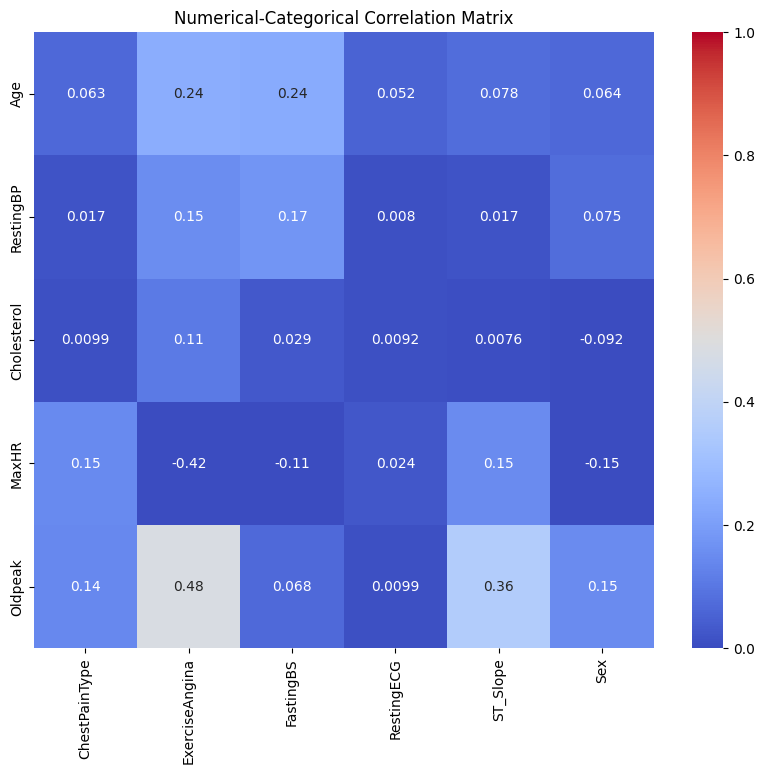

In [217]:

def eta_squared(anova_table):
    return anova_table['sum_sq'][0] / anova_table['sum_sq'].sum()

numerical_categorical_corr = pd.DataFrame(index=CONTINUOUS_FEATURES, columns=CATEGORICAL_FEATURES)

for cat_col in CATEGORICAL_FEATURES:
    if df[cat_col].nunique() == 2:  # Binary categorical variable
        # Convert binary categorical column to numerical values (0 and 1)
        df[cat_col] = df[cat_col].astype('category').cat.codes
        for num_col in CONTINUOUS_FEATURES:
            correlation, p_value = pointbiserialr(df[cat_col], df[num_col])
            numerical_categorical_corr.loc[num_col, cat_col] = correlation
    else:  # Categorical variable with more than two categories
        for num_col in CONTINUOUS_FEATURES:
            model = ols(f'{num_col} ~ C({cat_col})', data=df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            eta_sq = eta_squared(anova_table)
            numerical_categorical_corr.loc[num_col, cat_col] = eta_sq

# Display the numerical-categorical correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_categorical_corr.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Numerical-Categorical Correlation Matrix')
plt.show()

#### Again, the max correlation between numerical & categorical features = 0.48 between the (oldpeak) & (ExerciseAngina) which is not strong enough to exclude any of them.

<h2> 3.2 - Endocing Categorical Features </h2>

In [218]:
# convert categorical columns to numerical
numerical_data = df[CONTINUOUS_FEATURES]
encoded_data = pd.get_dummies(df[CATEGORICAL_FEATURES])

fully_numerical_df = pd.concat([numerical_data, encoded_data], axis=1)
fully_numerical_df


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ExerciseAngina,FastingBS,Sex,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.34,0.55,0.97,1.29,-0.87,0,0,1,False,True,False,False,False,True,False,False,False,True
1,-0.39,1.85,-1.18,0.63,0.18,0,0,0,False,False,True,False,False,True,False,False,True,False
2,-1.65,-0.10,0.85,-1.75,-0.87,0,0,1,False,True,False,False,False,False,True,False,False,True
3,-0.50,0.42,-0.51,-1.34,0.70,1,0,0,True,False,False,False,False,True,False,False,True,False
4,0.13,1.20,-0.88,-0.76,-0.87,0,0,1,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.81,-1.40,0.48,-0.35,0.38,0,0,1,False,False,False,True,False,True,False,False,True,False
914,1.60,0.81,-0.92,0.02,2.68,0,1,1,True,False,False,False,False,True,False,False,True,False
915,0.45,-0.10,-2.15,-1.05,0.38,1,0,1,True,False,False,False,False,True,False,False,True,False
916,0.45,-0.10,-0.07,1.37,-0.87,0,0,0,False,True,False,False,True,False,False,False,True,False


<h2> 3.3 PCA analysis </h2>

In [ ]:

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(fully_numerical_df)

# Evaluate PCA
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Reserved variance in each component: {[f"{var:.2f}" for var in explained_variance_ratio]}')
print(f"Total variance Reserved across all components: {np.sum(explained_variance_ratio):.2f}")

Reserved variance in each component: ['0.29', '0.14', '0.13']
Total variance Reserved across all components: 0.56


<h3> Plotting PCA outputs </h3>

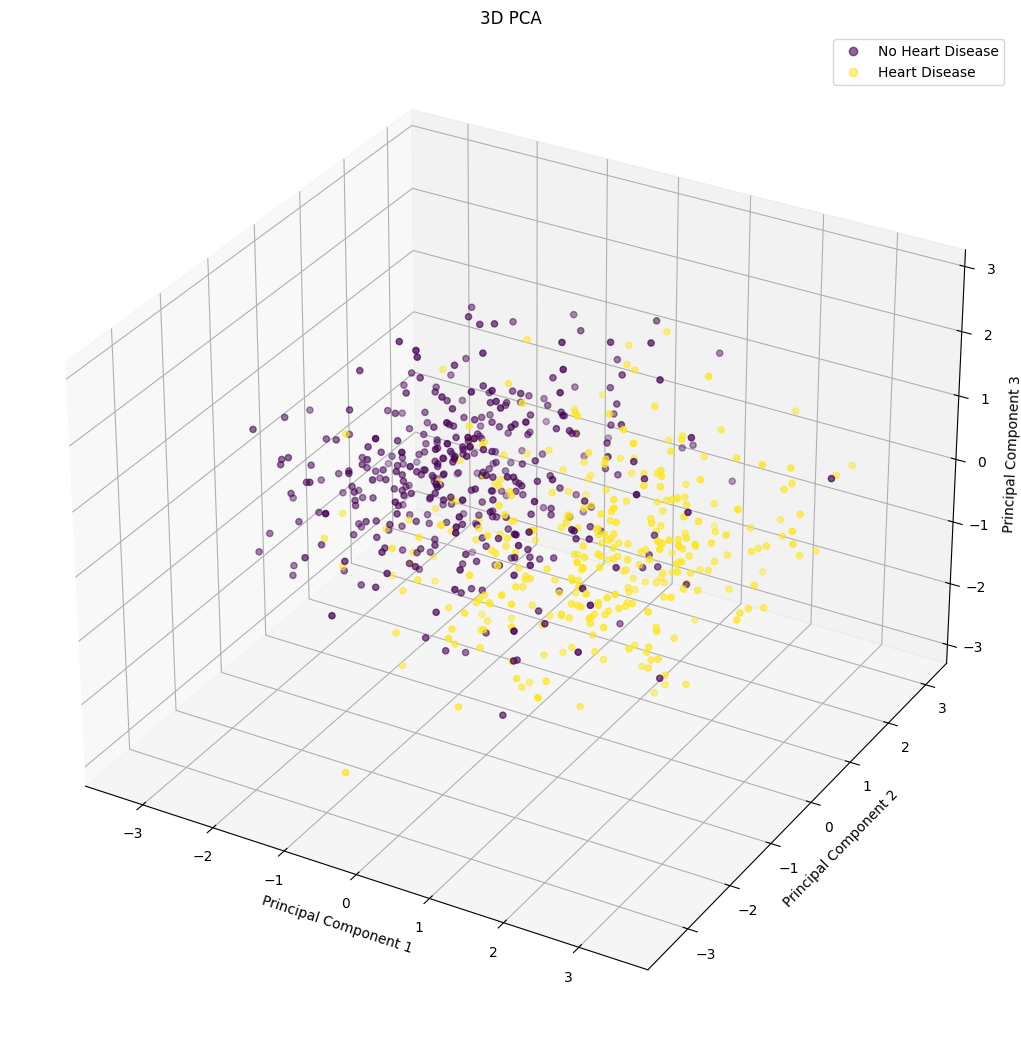

In [220]:
def plot_2d_pca(principalComponents):
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=df['HeartDisease'], cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA')
    # Create custom legend
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend_labels = ['No Heart Disease', 'Heart Disease']
    plt.legend(handles, legend_labels)
    return plt

def plot_3d_pca(principalComponents):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c=df['HeartDisease'], cmap='viridis')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA')
    # Create custom legend
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend_labels = ['No Heart Disease', 'Heart Disease']
    ax.legend(handles, legend_labels)
    return plt
if principalComponents.shape[1] == 2:
    pca_plot = plot_2d_pca(principalComponents)
elif principalComponents.shape[1] == 3:
    pca_plot = plot_3d_pca(principalComponents)
pca_plot.show()

<h3> It is clear from the distribution of the points that the best clustering algorithm is KMeans </h3>

<h1> 4 - Clustering </h1>

<h2> 4.1 Choosing the right number of clusters for the prencipal components </h2>

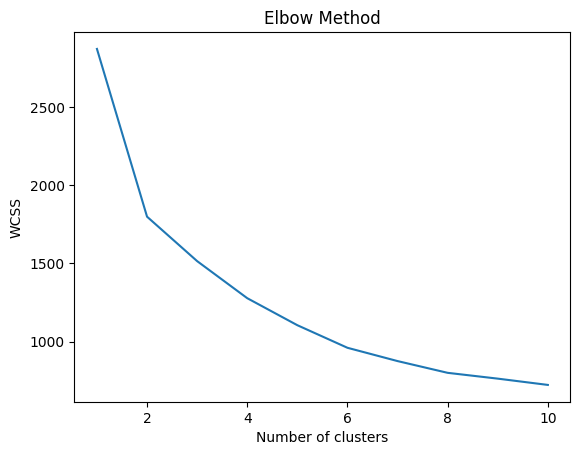

In [221]:
# we will use all features
# first lets find the best number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
# WCSS stands for (Within Cluster Sum of Squares)
plt.ylabel('WCSS')
plt.show()



<h3> As we can see from the graph, the optimal number of clusters is 2. </h3>

<h2> 4.2 - KMeans clustering </h2>

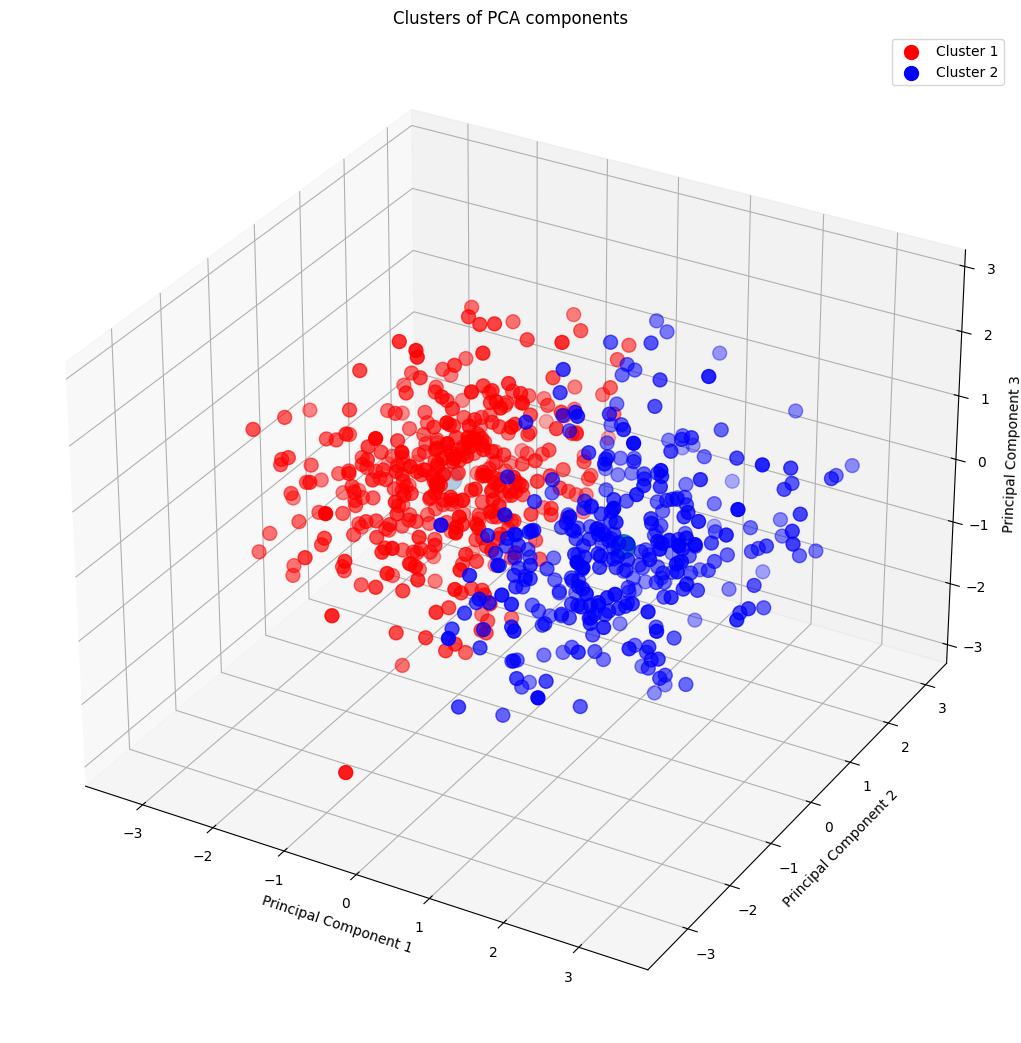

In [222]:
# perform clustering with 2 clusters

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(principalComponents)

def display_clusters_for_2_components(principalComponents, y_kmeans, kmeans):
    plt.scatter(principalComponents[y_kmeans == 0, 0], principalComponents[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
    plt.scatter(principalComponents[y_kmeans == 1, 0], principalComponents[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
    plt.title('Clusters of patients')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    return plt


def display_clusters_for_3_components(principalComponents, y_kmeans, kmeans):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(principalComponents[y_kmeans == 0, 0], principalComponents[y_kmeans == 0, 1], principalComponents[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
    ax.scatter(principalComponents[y_kmeans == 1, 0], principalComponents[y_kmeans == 1, 1], principalComponents[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300)
    ax.set_title('Clusters of PCA components')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.legend()
    return plt

if principalComponents.shape[1] == 2:
    clusters_plot = display_clusters_for_2_components(principalComponents, y_kmeans, kmeans)
elif principalComponents.shape[1] == 3:
    clusters_plot = display_clusters_for_3_components(principalComponents, y_kmeans, kmeans)
clusters_plot.show()


<h1> 5 - Classification </h1>

## Model selection

## Model training

## Model evaluation